# DESAFIO Kaggle - Santander: Customer transaction prediction

In [1]:
# https://www.kaggle.com/c/santander-customer-transaction-prediction

## Parte I - Importando os dados e as bibliotecas

### Importação das bibliotecas

In [1]:
#importando as bibilitecas

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv 
import seaborn as sns
import plotly
import scipy.special
import xgboost as xgb 
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score


### Importação do arquivo sample_submission

In [2]:
# Esse arquivo apenas indica o formato do arquivo que deve ser sumetido ao Kaggle para a competição

In [3]:
df_sample = pd.read_csv(r'Santander_customer_transaction_prediction/sample_submission.csv')

In [4]:
df_sample.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [5]:
df_sample.tail()

,ID_code,target
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0
199999,test_199999,0


In [6]:
df_sample.target.value_counts()

0    200000
Name: target, dtype: int64

### Importação do arquivo de teste para submissão ao Kaggle

In [7]:
# Esse será o arquivo que utilizaremos posteriormente para testar o modelo de machine learning

In [8]:
df_test_submission = pd.read_csv(r'Santander_customer_transaction_prediction/test.csv')

In [9]:
df_test_submission.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [10]:
list (df_test_submission.columns.values)

['ID_code',
 'var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90

In [58]:
df_test_submission.shape

(200000, 201)

In [59]:
# Teremos que utilizar as features (X) para prever o target (coluna a ser criada)

### Importação do arquivo de treino

In [26]:
# Vamos utilizar o arquivo de treino para criar o nosso modelo de machine learning

In [11]:
df_train0 = pd.read_csv(r'Santander_customer_transaction_prediction/train.csv')
df_train = df_train0.copy()

## Parte II - Pré-processamento e EDA (Exploratory Data Analysis)

In [16]:
# Análise do arquivo de treino

In [17]:
df_train.shape

(200000, 202)

In [3]:
pd.set_option('display.max_columns', None) #mostra todas as colunas
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [19]:
# Verificação se há variáveis com dados nulos

In [20]:
#df_train.isnull().sum()

In [21]:
# função para mostrar o tipo de cada variável e os valores nulos
# fonte: Kaggle Gabriel Preda
#https://www.kaggle.com/gpreda/santander-eda-and-prediction

In [4]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [5]:
%time
missing_data(df_train)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [24]:
# Não há valores nulos em nosso dataset

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
pd.set_option('display.max_columns', None) #mostra todas as colunas
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [27]:
# Como não sabemos quais são as variáveis, fica muito difícil avaliar se os dados estão coerentes.

In [28]:
# Análise da variável target

In [29]:
# A variável target é categórica binária (0 ou 1)

In [9]:
df_train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [10]:
perc_0 = 100*(sum(df_train['target']==0))/df_train.shape[0]
perc_1 = 100*(sum(df_train['target']==1))/df_train.shape[0]
print ('Percentual de 0 = ',perc_0)
print ('Percentual de 1 = ', perc_1)

Percentual de 0 =  89.951
Percentual de 1 =  10.049


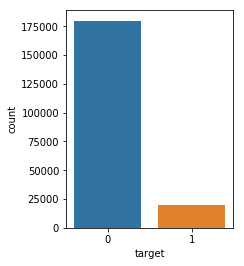

In [11]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x = df_train.target, data = df_train)


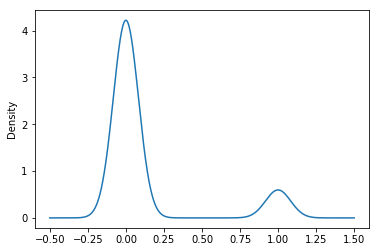

In [12]:
df_train['target'].sample(1000,random_state=42).plot.kde()

In [34]:
# Podemos verificar que há uma quantidade muito maior de target = 0 do que target = 1

### Análise da distribuição 

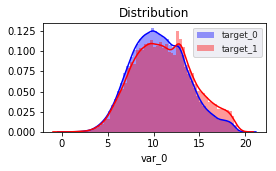

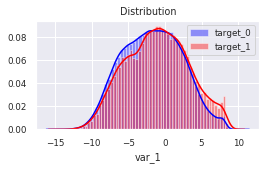

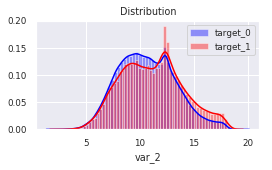

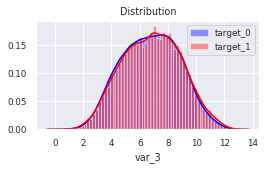

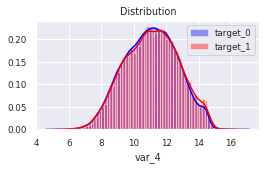

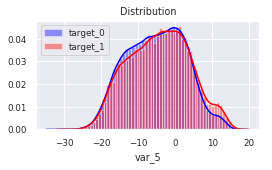

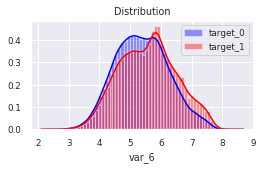

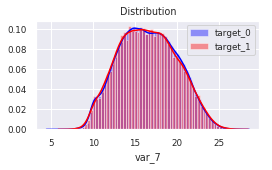

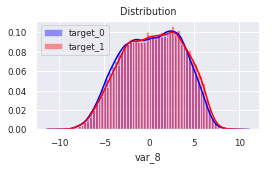

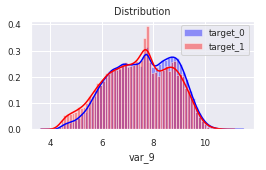

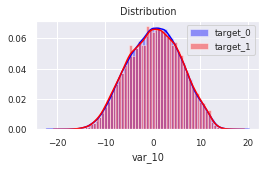

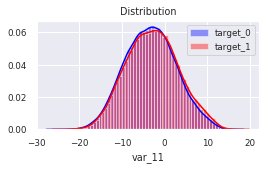

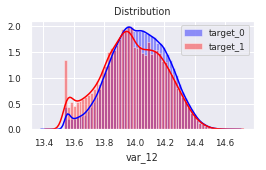

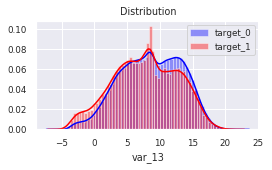

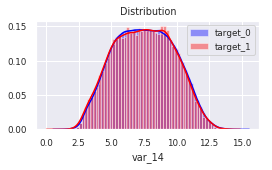

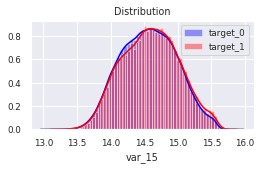

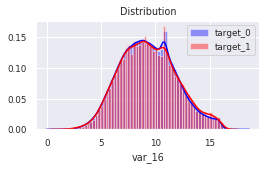

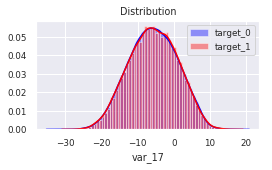

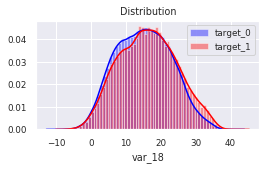

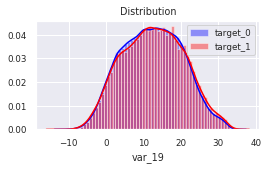

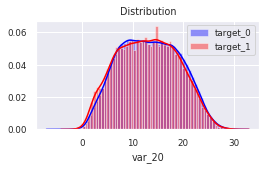

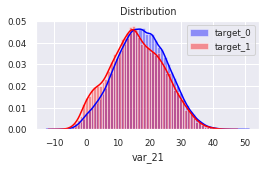

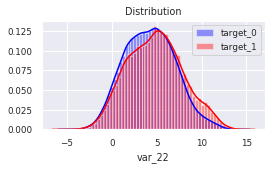

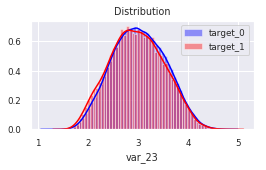

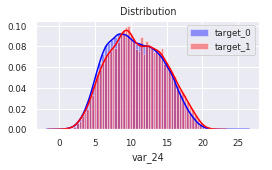

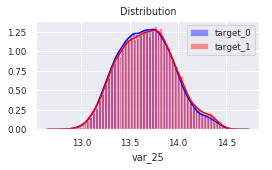

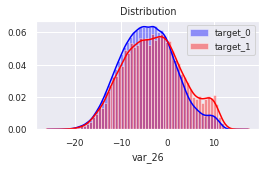

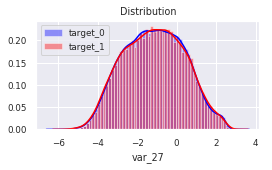

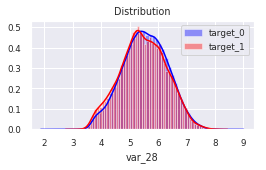

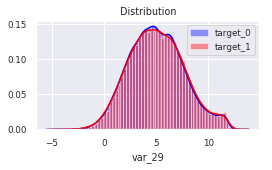

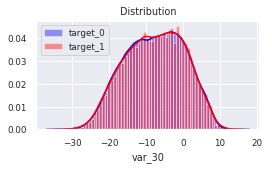

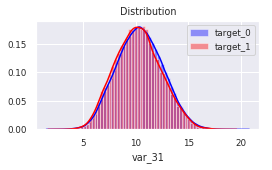

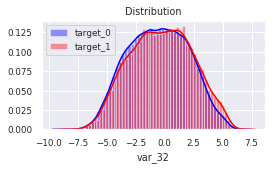

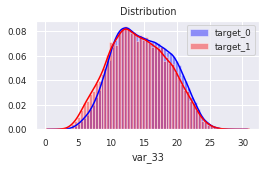

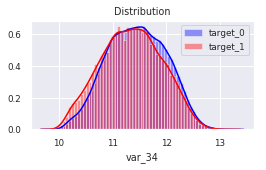

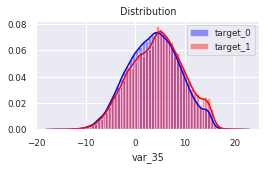

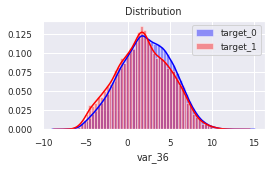

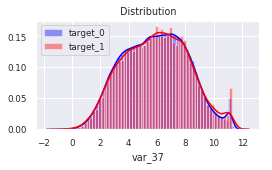

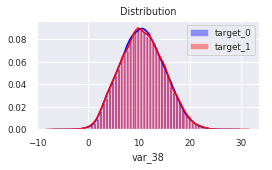

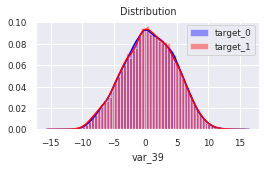

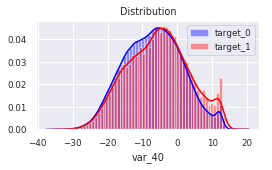

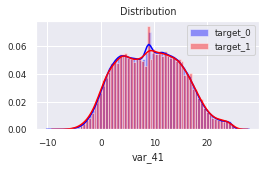

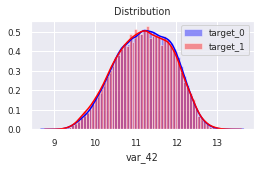

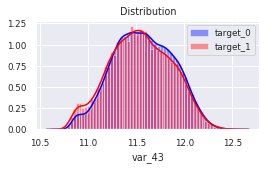

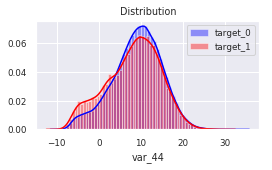

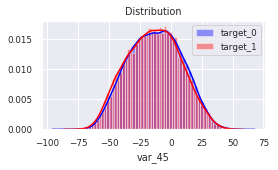

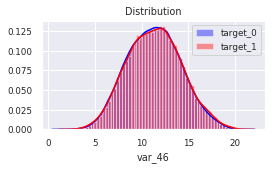

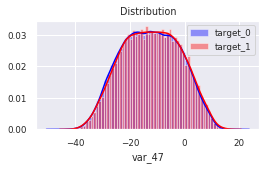

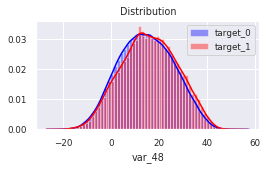

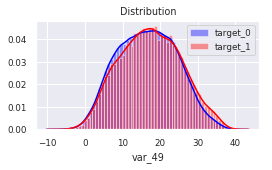

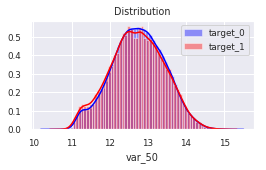

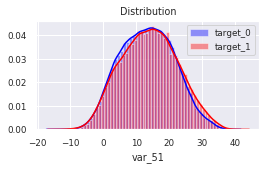

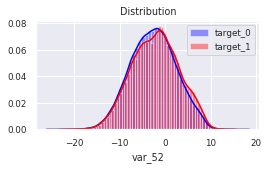

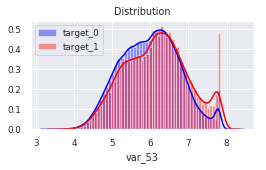

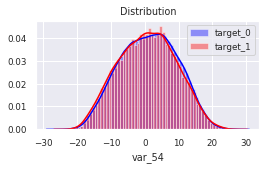

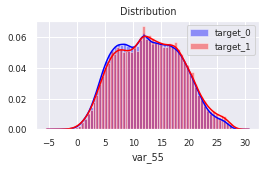

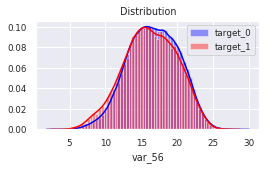

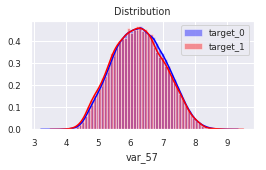

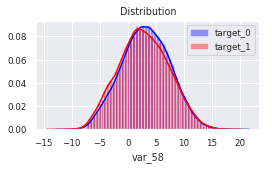

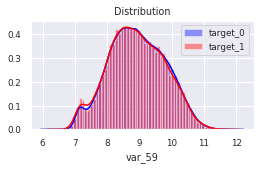

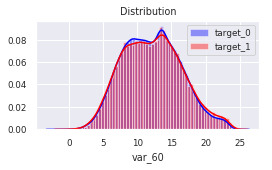

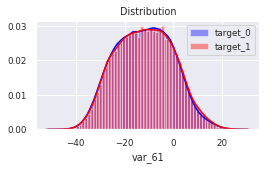

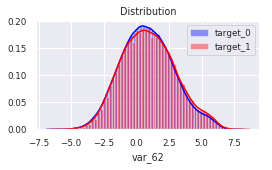

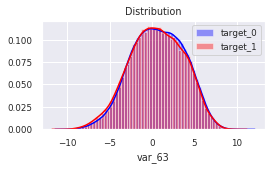

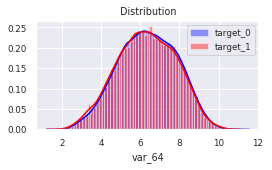

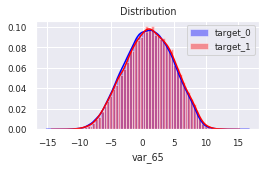

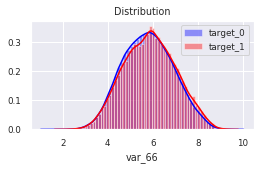

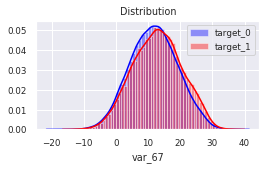

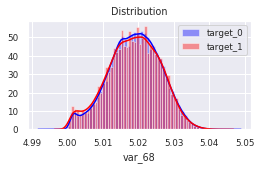

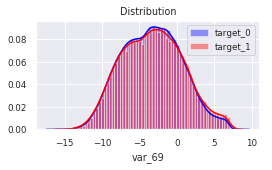

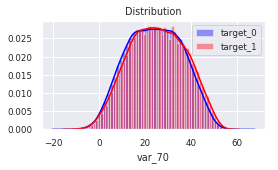

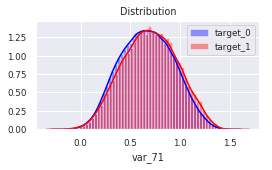

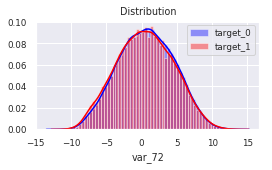

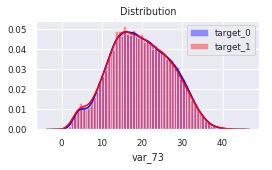

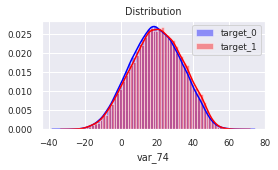

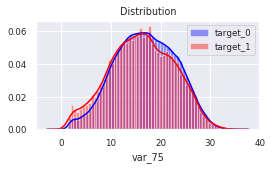

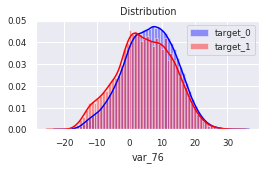

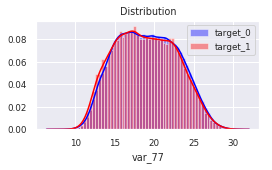

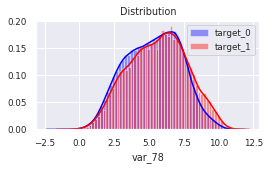

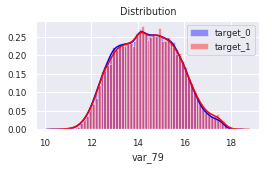

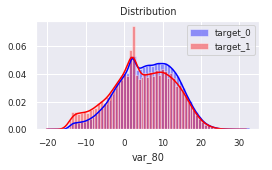

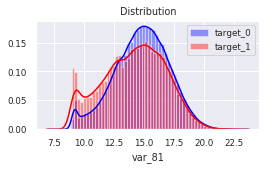

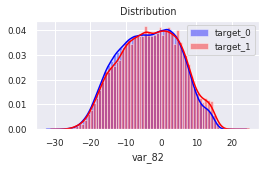

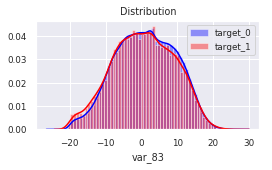

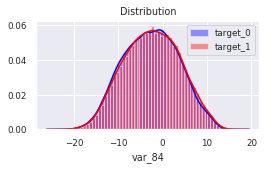

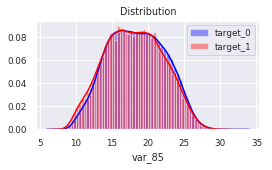

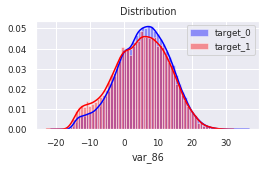

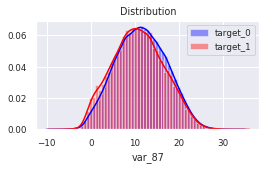

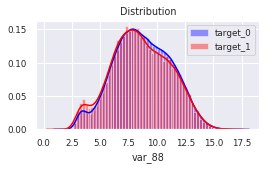

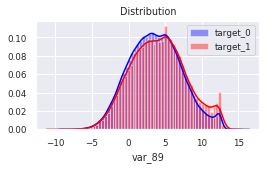

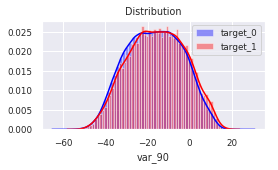

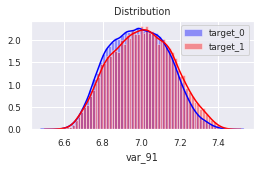

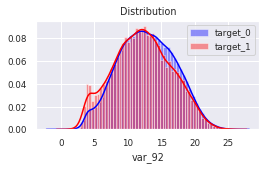

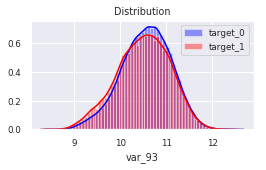

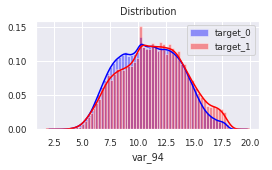

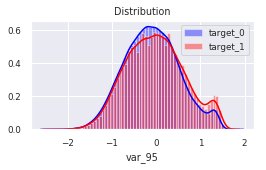

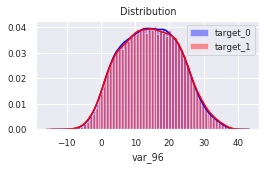

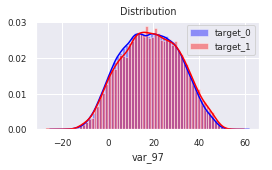

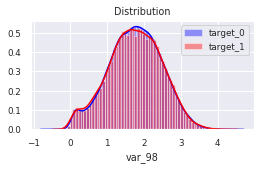

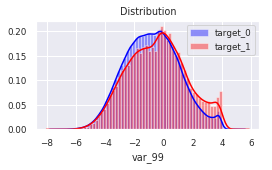

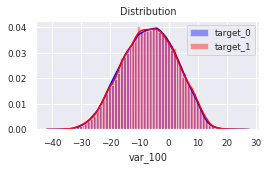

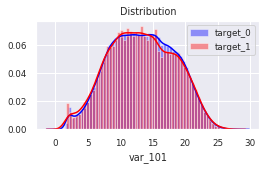

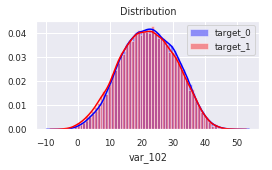

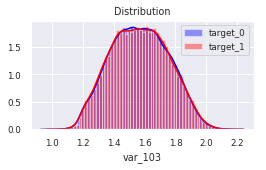

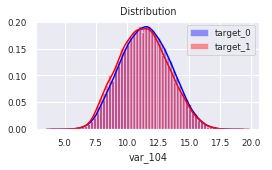

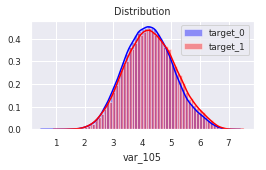

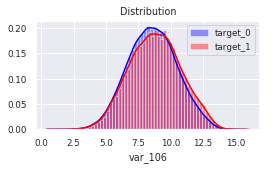

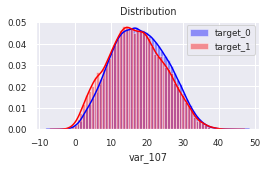

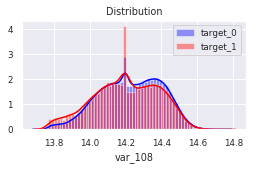

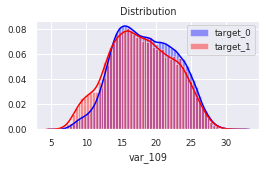

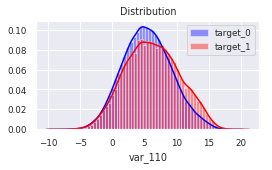

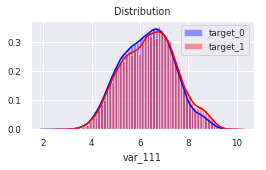

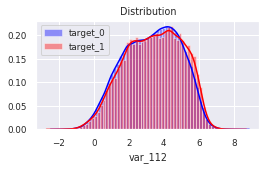

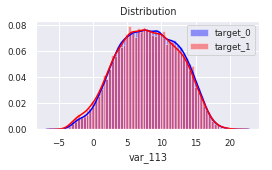

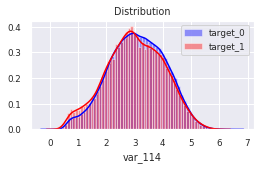

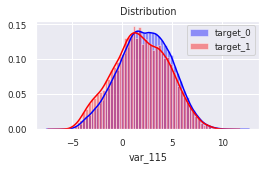

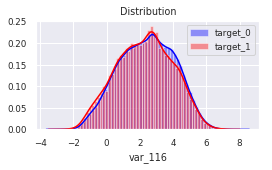

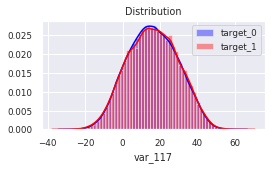

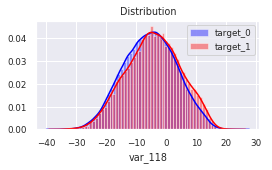

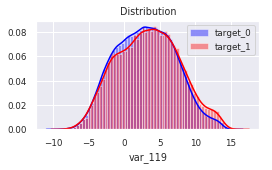

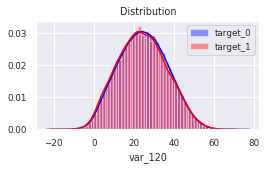

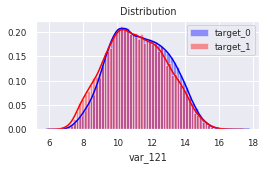

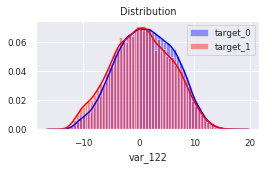

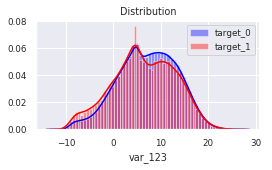

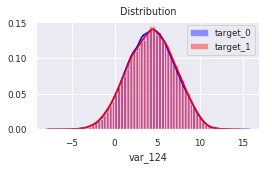

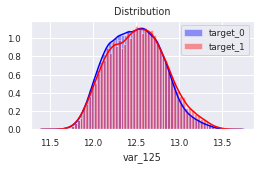

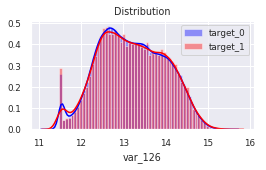

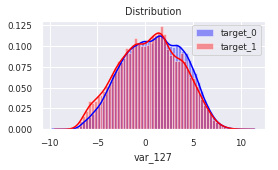

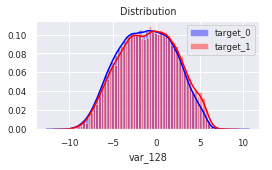

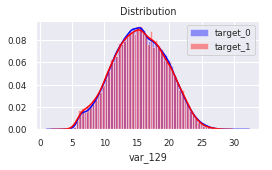

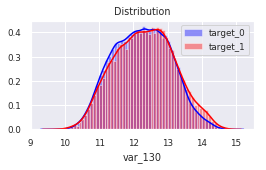

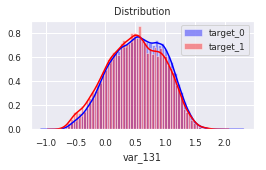

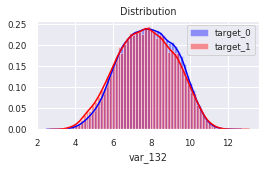

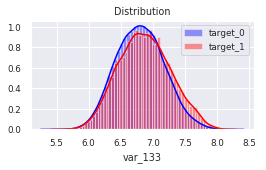

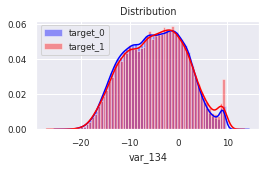

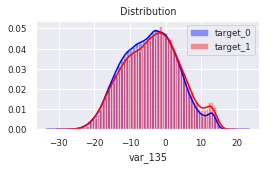

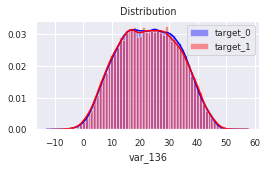

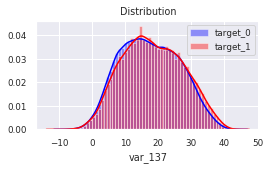

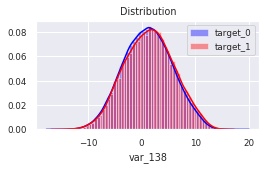

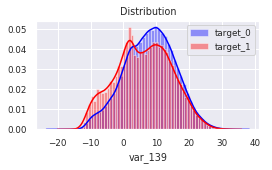

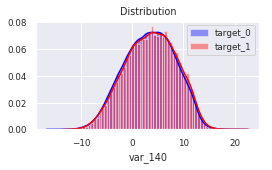

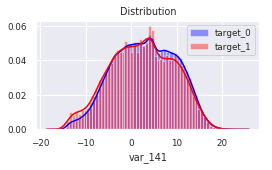

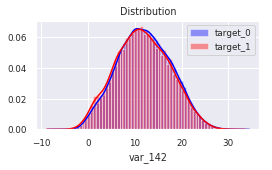

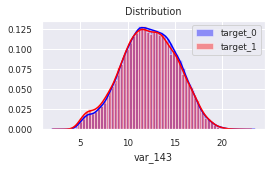

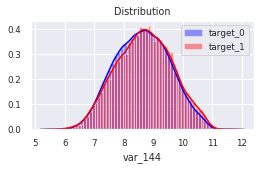

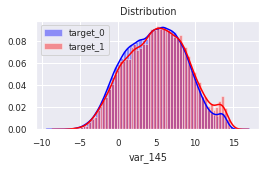

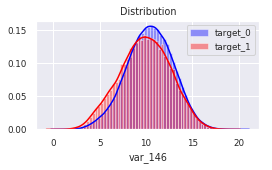

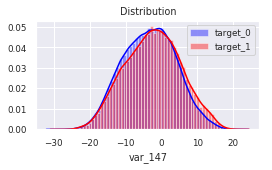

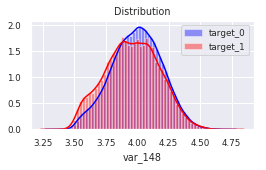

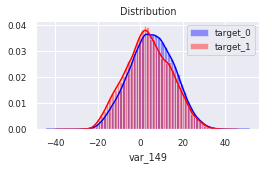

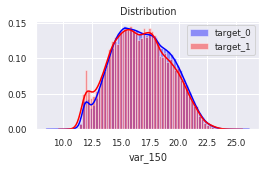

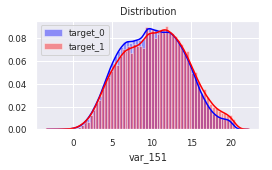

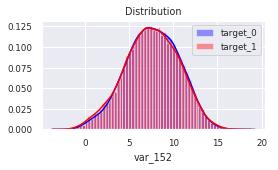

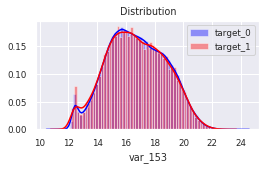

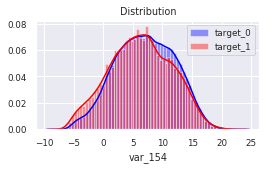

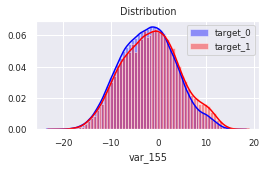

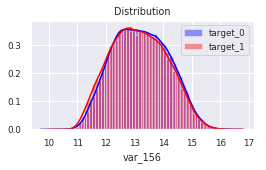

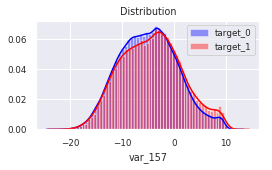

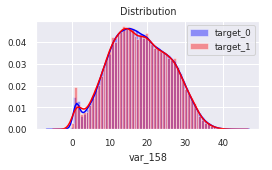

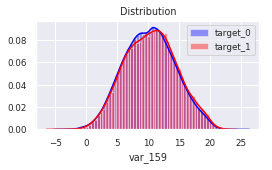

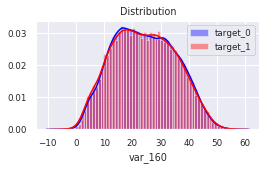

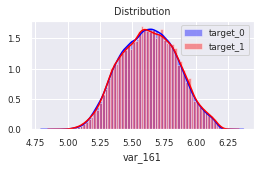

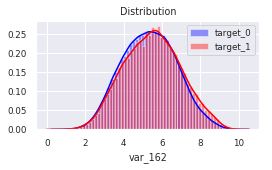

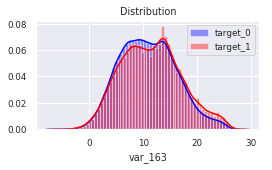

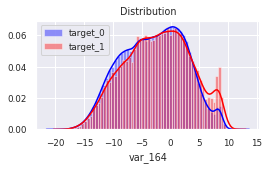

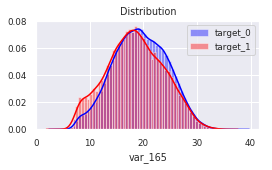

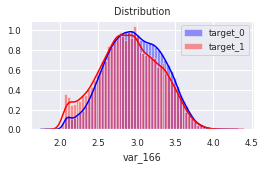

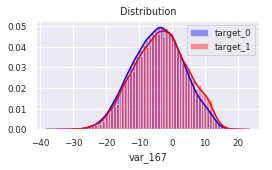

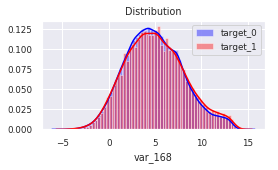

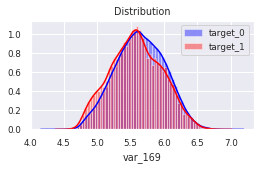

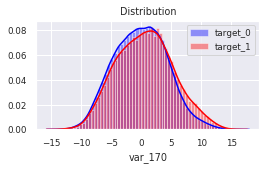

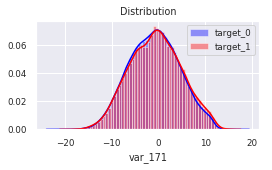

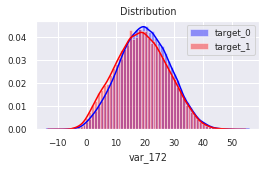

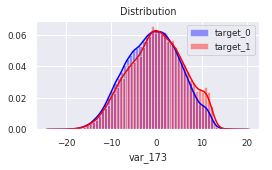

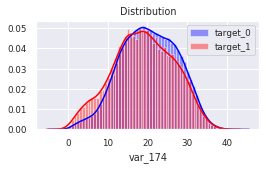

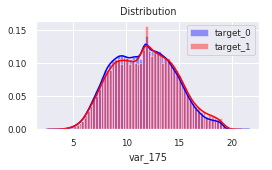

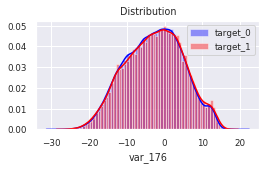

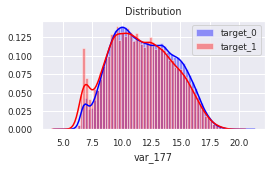

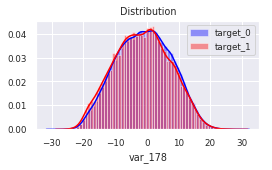

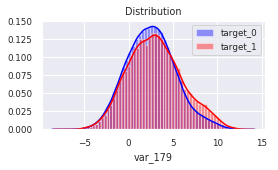

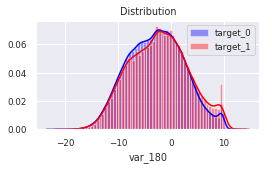

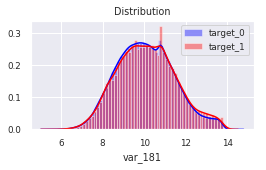

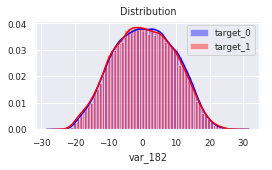

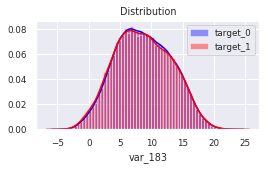

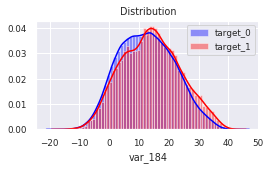

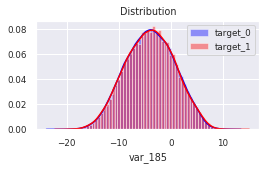

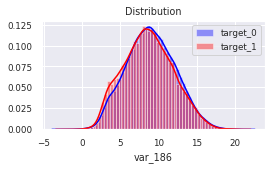

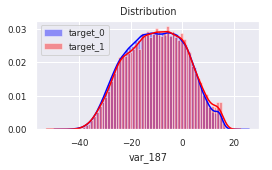

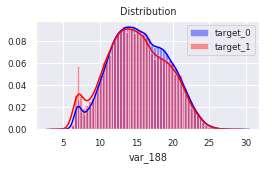

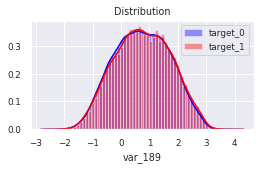

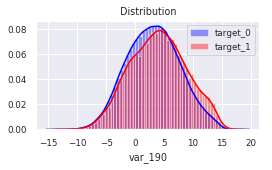

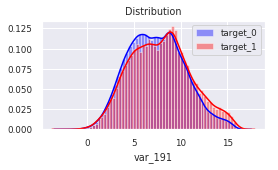

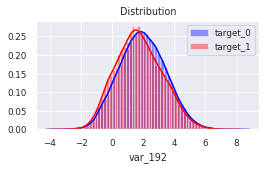

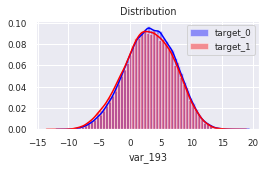

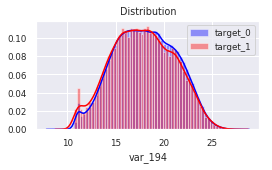

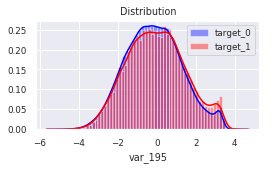

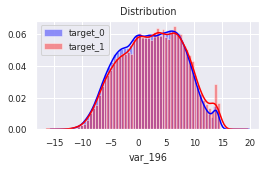

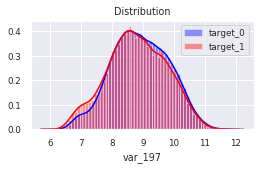

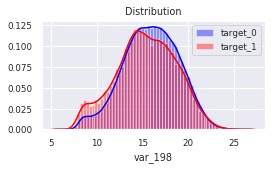

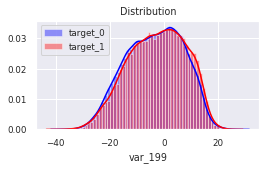

In [10]:
target_0 = df_train.loc[df_train['target']==0]
target_1 = df_train.loc[df_train['target']==1]
features = df_train.columns.values[2:202]

for i in features:
    plt.figure(figsize=(4,2))
    plt.title("Distribution")
    sns.distplot(target_0[i], kde=True, bins =60, color = 'blue', label = 'target_0')
    sns.distplot(target_1[i], kde=True, bins =60, color = 'red', label = 'target_1')
    sns.set(font_scale=0.8)
    plt.legend()
    plt.show()

In [ ]:
#https://mathisonian.github.io/kde/   # explicação sobre curva kde

### Gráfico de dispersão

In [ ]:
# Imagem retirada do notebook para reduzir o tamanho do arquivo

In [3]:
#var = list (df_train.columns.values)
#var.remove('ID_code')
#var.remove('target')

#sample1 = df_train[df_train['target']==0].sample(500, random_state = 42)
#sample2 = df_train[df_train['target']==1].sample(500, random_state = 42)

## Plot
#for i in var:
    #plt.scatter(y=sample1[i], x=sample1[i].index, alpha=0.4)
    #plt.scatter(y=sample2[i], x=sample2[i].index, alpha=0.4, color = 'red')
    #plt.title(i)
    #plt.xlabel('indice')
    #plt.ylabel(i)
    #plt.show()

### Bloxplot dados não balanceados

In [ ]:
# Imagem retirada do notebook para reduzir o tamanho do arquivo

In [14]:
#for i in var:
#    f, ax = plt.subplots(figsize =(3,3))
#    ax = sns.boxplot(x=df_train['target'], y=df_train[i])


### Análise da importância das features

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Definindo X e y

In [13]:
X_train = df_train.drop(columns =[ 'ID_code','target'], axis=1)

In [14]:
y_train = df_train['target']

In [15]:
# Definindo uma variável com as colunas de X_train

In [16]:
feat_labels = X_train.columns

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) var_81                         0.012327
 2) var_139                        0.009753
 3) var_12                         0.009693
 4) var_53                         0.008793
 5) var_26                         0.008606
 6) var_110                        0.008426
 7) var_174                        0.008101
 8) var_146                        0.008015
 9) var_166                        0.007937
10) var_109                        0.007849
11) var_22                         0.007833
12) var_80                         0.007628
13) var_6                          0.007597
14) var_76                         0.007431
15) var_99                         0.007395
16) var_78                         0.007079
17) var_165                        0.007017
18) var_198                        0.006957
19) var_133                        0.006891
20) var_179                        0.006840
21) var_148                        0.006808
22) var_13                         0.006777
23) var_2                       

In [46]:
# importances: retorna um array com o nível de importância para cada feature, ordem segue a ordem das colunas:
# de var_0 a var_199

# indices: retorna um array com o número da feature (nome da variável), ordenado de acordo com sua importância 
#(ordem descrescente)

In [47]:
indices

array([ 81, 139,  12,  53,  26, 110, 174, 146, 166, 109,  22,  80,   6,
        76,  99,  78, 165, 198, 133, 179, 148,  13,   2, 190,  44,   0,
       164,  21,  40,   1,  34,  94, 170,  33, 154, 108, 191,  92,   9,
       177,  18, 184, 121, 115, 123,  91,  75, 122, 169,  86,  95, 155,
        56, 147, 188,  67,  89, 127,   5, 119, 130, 107, 173,  93, 163,
       180, 141, 157, 149,  51, 197, 118, 145, 106,  32,  49, 162, 172,
       131, 151, 135,  36, 125, 132,  35,  43, 195, 111, 167,  87, 114,
       150,  71,  85, 137,  24, 196, 192,  82,  90, 128,  83, 144,  52,
       194, 175,  48, 105,  58,  28,  69, 171, 102, 134, 168, 116,  15,
        70,  88,  23,  11, 186,  20, 152,  55, 193, 112,   3,  66,  19,
        60, 156,  37, 113, 143,  97,  46, 199,   4, 178,  79, 138,  16,
        50,  63,  62,  41,  77, 142,  59,   8, 104,  64, 181,  45, 153,
        39, 126,  68, 187, 161,  73, 136,  57,  72, 117, 182, 124, 176,
        65,  98,  42, 101, 189,  74,  31,  25, 160, 183,   7,  9

### Análise de correlação das features com o target

In [48]:
corrmat = df_train.corr()['target'].sort_values(ascending = False)
corrmat[0:40]                                                        

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
var_22     0.060558
var_99     0.058367
var_190    0.055973
var_2      0.055870
var_133    0.054548
var_0      0.052390
var_1      0.050343
var_179    0.050002
var_40     0.049530
var_184    0.048315
var_78     0.048245
var_170    0.047973
var_191    0.047114
var_94     0.046296
var_67     0.044673
var_18     0.043479
var_173    0.042022
var_164    0.040997
var_118    0.040358
var_147    0.040280
var_91     0.040127
var_89     0.039369
var_95     0.038531
var_155    0.037240
var_35     0.036567
var_71     0.033607
var_106    0.032947
var_162    0.032647
var_157    0.032642
var_48     0.032334
var_163    0.031811
var_180    0.031190
var_5      0.030979
var_119    0.030975
var_145    0.030917
Name: target, dtype: float64

In [49]:
# As 10 variáveis mais positivamente correlacionadas com a target

In [50]:
corrmat = df_train.corr()
cols = corrmat.nlargest(11,'target')['target'].index
cols

Index(['target', 'var_6', 'var_110', 'var_53', 'var_26', 'var_22', 'var_99',
       'var_190', 'var_2', 'var_133', 'var_0'],
      dtype='object')

In [51]:
# As 10 variávais mais negativamente correlacionadas com a target

In [52]:
cols_negative = corrmat.nsmallest(10,'target')['target'].index
cols_negative

Index(['var_81', 'var_139', 'var_12', 'var_146', 'var_76', 'var_174', 'var_21',
       'var_166', 'var_80', 'var_165'],
      dtype='object')

### Heatmap das 20 variáveis mais correlacionadas com a variável target

In [53]:
colunas_heat_map = []
for i in cols:
    colunas_heat_map.append (i)
for j in cols_negative:
    colunas_heat_map.append(j)

colunas_heat_map

['target',
 'var_6',
 'var_110',
 'var_53',
 'var_26',
 'var_22',
 'var_99',
 'var_190',
 'var_2',
 'var_133',
 'var_0',
 'var_81',
 'var_139',
 'var_12',
 'var_146',
 'var_76',
 'var_174',
 'var_21',
 'var_166',
 'var_80',
 'var_165']

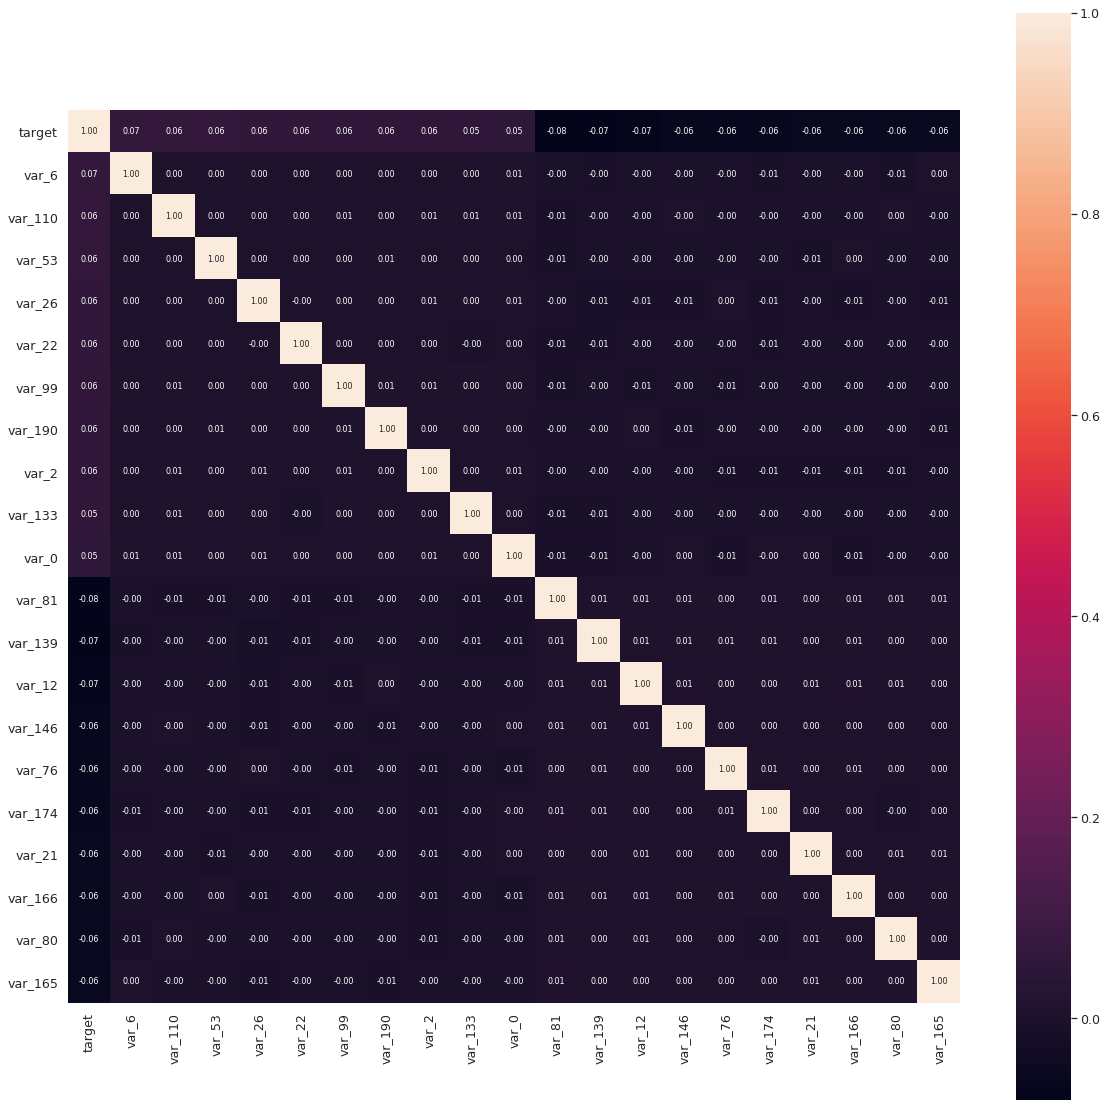

In [54]:
corrmat = df_train[colunas_heat_map].corr()
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(corrmat, 
                 cbar=True, # formatando a barra lateral de cores para o heatmap
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 8}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns)

In [55]:
# Mesmo para as variáveis mais correlacionadas, o valor de correlação é ainda muito baixo. 

### Pairplot

In [56]:
# Pairplot de todas as variáveis

In [57]:
# Vamos dividir o dataset em 20 partes para análise do pairplot (quebrando as colunas):


In [ ]:
# Imagem retirada para reduzir o tamanho do arquivo do notebook

In [2]:
#colunas = list(df_train.columns.values)
#selected_columns=[]
#contador = 1
#while contador <= len(colunas):
    #selected_columns =  colunas[(contador+1):(contador+12)]
    #selected_columns.append('target')
    #df1 = df_train[selected_columns].copy()
    #sns.pairplot(data = df1.sample(100, random_state =42), height=1.8, hue = 'target')
    #contador += 11
    

In [59]:
# Não consegui tirar muitas conclusões a partir do pairplot.

## Excluindo valores extremos

In [ ]:
# Guardando a quantidade de linhas do data set df_train original

In [17]:
qtd_linhas = df_train.shape[0]

In [18]:
qtd_linhas

200000

In [19]:
# Criando uma função para excluir os dados que estão abaixo e acima de 3 desvios padrão da média:

In [20]:
def exclui_extremos (nome_variavel):
    global df_train
    x_menos_3dv = df_train[nome_variavel].mean()-(3*df_train[nome_variavel].std())
    x_mais_3dv = df_train[nome_variavel].mean()+(3*df_train[nome_variavel].std())
    linhas_selecionadas = ((df_train[nome_variavel]<x_mais_3dv)&(df_train[nome_variavel]>x_menos_3dv))   
        
    df_train = df_train[linhas_selecionadas].copy()
    
    return 

In [21]:
colunas = list(df_train.columns.values)

In [22]:
colunas.remove('ID_code')
colunas.remove('target')

In [23]:
for i in colunas:
    exclui_extremos(i)

In [24]:
# Dataset após exclusão dos extremos

In [25]:
df_train.shape

(188964, 202)

In [26]:
# Cálculo do percentual de dados preservados:

In [27]:
perc_preservado = df_train.shape[0]*100/qtd_linhas
perc_preservado

94.482

In [28]:
# Redefinindo X e y

In [29]:
X_train = df_train.drop(columns =[ 'ID_code','target'], axis=1)

In [30]:
y_train = df_train['target']

##  Balancemaneto dos dados : oversampling: SMOTE

In [61]:
# Necessário primeiro separar o dataset em treino e teste
# https://beckernick.github.io/oversampling-modeling/
# https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# https://medium.com/analytics-vidhya/balance-your-data-using-smote-98e4d79fcddb
# https://towardsdatascience.com/a-deep-dive-into-imbalanced-data-over-sampling-f1167ed74b5

In [62]:
# Método SMOTE: cria dados sintéticos a partir da observação dos dados vizinhos de um ponto (k-neighbors)
# Em comparação ao random-oversampling, o SMOTE tem menos chance de causar overfitting

### Dividindo o dataset em treino e teste

In [32]:
X_train,X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [78]:
# o argumento stratify verifica a proporção de 0 e 1 na variável target (y_train) e mantém a mesma proporção nos dados de
# treino e de teste

In [33]:
X_train.shape

(151171, 200)

In [34]:
X_train[0:5]

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
183681,8.1419,0.7605,8.7000,3.7064,11.9299,-3.5755,5.7714,20.6764,-2.6334,7.5351,...,-1.8064,7.7971,1.8135,6.2744,15.9995,1.2361,0.1655,9.7232,11.9862,-7.7394
65548,8.7207,-0.9195,12.6340,7.5198,12.0961,-0.3276,5.8287,18.4126,2.1640,7.7064,...,4.1698,11.4356,0.4463,2.4215,17.1594,-1.7654,1.7403,10.4623,13.8593,15.7956
17024,14.9185,1.1119,14.4702,5.6921,13.2491,-3.2769,4.8241,17.5901,1.8765,8.9059,...,8.3432,8.0979,0.4515,4.4166,13.1245,0.0238,6.7598,8.0735,12.2549,-3.7240
162201,8.3764,-1.1668,6.6384,6.5361,12.1453,-20.1019,5.8245,13.8982,1.1449,7.1865,...,-2.0897,10.0660,0.1878,5.9301,21.1471,-2.8396,5.3589,6.5574,9.8658,-13.2769
76105,10.8355,-10.1769,8.5420,8.0455,13.2557,-14.1227,6.3830,18.0422,3.5923,9.1730,...,-0.4442,6.4683,3.2838,2.0196,21.7131,-0.6881,-4.1136,8.0380,16.9607,0.7727


In [35]:
y_train.shape

(151171,)

In [36]:
y_train[0:5]

183681    0
65548     0
17024     1
162201    0
76105     0
Name: target, dtype: int64

In [37]:
X_test.shape

(37793, 200)

### Fazendo o balanceamento apenas do X_train

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
sm = SMOTE(random_state=42, ratio = 1.0)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

# com ratio = 1, significa que no final quero ter a mesma quantidade de amostras das duas classes (target = 0 e 
# target = 1)
# default: k-neighbors = 5

In [23]:
# Verificação dos dados balanceados

In [24]:
# X_train_bal:

In [40]:
X_train_bal.shape

(272224, 200)

In [41]:
type(X_train_bal)

numpy.ndarray

In [42]:
X_train_bal[0:5]

array([[ 8.14190e+00,  7.60500e-01,  8.70000e+00,  3.70640e+00,
         1.19299e+01, -3.57550e+00,  5.77140e+00,  2.06764e+01,
        -2.63340e+00,  7.53510e+00,  6.23030e+00, -3.80690e+00,
         1.43380e+01,  8.10760e+00,  9.22660e+00,  1.43128e+01,
         9.53390e+00, -8.59080e+00,  2.25095e+01,  1.18250e+01,
         1.31347e+01,  2.39033e+01,  7.31450e+00,  4.09460e+00,
         7.91130e+00,  1.34556e+01,  3.27400e-01,  5.27600e-01,
         4.09350e+00,  9.37120e+00, -2.19028e+01,  8.65840e+00,
         9.00000e-02,  1.52388e+01,  1.11549e+01,  7.93070e+00,
         5.17840e+00,  5.32800e+00,  2.98320e+00, -1.40720e+00,
        -1.65755e+01,  3.14000e-01,  1.09223e+01,  1.12675e+01,
         1.33690e+00, -1.66030e+01,  1.08382e+01, -1.71381e+01,
         3.89110e+00,  1.37206e+01,  1.25293e+01,  1.63920e+01,
        -6.92700e+00,  4.48140e+00,  3.04790e+00,  7.28270e+00,
         1.24507e+01,  6.36140e+00,  4.12030e+00,  8.74090e+00,
         1.19176e+01, -1.50079e+01, -5.2

In [28]:
# y_train_bal:

In [43]:
y_train_bal.shape

(272224,)

In [44]:
type(y_train_bal)

numpy.ndarray

In [45]:
y_train_bal

array([0, 0, 1, ..., 1, 1, 1])

In [46]:
# X_train_bal e y_train_bal possuem o mesmo número de linhas (ok)

In [47]:
# Verficando o número de target = 0 e target =1 

In [48]:
import collections, numpy
collections.Counter(y_train_bal)

Counter({0: 136112, 1: 136112})

In [49]:
# O balancemaneto está ok, pois temos a mesma quantidade de 0 e de 1 para a variável target.

In [50]:
# Renomeando o X_train e y_train com os dados balanceados

In [51]:
X_train = X_train_bal
y_train = y_train_bal

##  PCA

### Colocando os dados na mesma escala

In [52]:
#importando a biblioteca
from sklearn.preprocessing import StandardScaler
#instanciando a variável
sc = StandardScaler()
#ajustando os dados de treino
X_train = sc.fit_transform(X_train)
#transformando os dados de teste
X_test = sc.transform(X_test)

In [53]:
# Conferindo os dados para aplicar os modelos

In [54]:
y_test.shape

(37793,)

In [55]:
X_test.shape

(37793, 200)

In [56]:
# Os dados de teste estão ok (mesmo número de linhas)

In [57]:
X_train.shape

(272224, 200)

In [58]:
y_train.shape

(272224,)

In [59]:
# Os dados de treino estão ok (mesmo número de linhas)

In [60]:
# Agora temos:
# X_train com dados balanceados e na mesma escala
# X_test não balanceado e na mesma escala (aplicamos o scaling)
# y_test não balanceado (sem necessidade de scaling)
# y_train balanceado (sem necessidade de scaling)

### Redução de dimensionalidade : Aplicando o PCA

In [61]:
# importando as bibliotecas
from sklearn.decomposition import PCA


In [62]:
for i in range (20,51,10):
    print ('Number of components = ', i)
    pca = PCA(n_components = i)
    X_train_pca = pca.fit_transform(X_train)
    print ('*'*30)
    print ('Noise Variance: ', pca.noise_variance_)
    print('Components: ', pca.components_)
    print ('*'*30)

Number of components =  20
******************************
Noise Variance:  0.9914361272129816
Components:  [[-0.13816358 -0.11906929 -0.1007502  ...  0.06672945  0.12225576
  -0.06184446]
 [ 0.06632419 -0.02076524 -0.00178508 ... -0.05059877  0.04517104
  -0.10274299]
 [-0.02208031  0.03751097  0.02665102 ... -0.08718088 -0.03974934
  -0.02854052]
 ...
 [ 0.04087717  0.05537239 -0.01317882 ... -0.07636019 -0.03721108
  -0.03354336]
 [-0.02738818 -0.02777012 -0.01054828 ...  0.07860201 -0.03840953
  -0.0090366 ]
 [ 0.07743565  0.01665557  0.02670411 ...  0.03279452 -0.02958915
  -0.00301027]]
******************************
Number of components =  30
******************************
Noise Variance:  0.9885315127494908
Components:  [[-0.10815681 -0.11726822 -0.12544736 ...  0.06095573  0.09945767
  -0.0540578 ]
 [-0.03108168  0.10275972 -0.02978651 ...  0.09447539 -0.01495678
  -0.07626249]
 [-0.02385547 -0.00419572 -0.07610056 ...  0.12603015  0.01031213
  -0.08749275]
 ...
 [-0.03136529  

In [63]:
pca.n_components

50

In [64]:
pca.explained_variance_ratio_

array([0.00829771, 0.00558307, 0.00552992, 0.00552678, 0.00546608,
       0.00544562, 0.00543126, 0.00541506, 0.00539903, 0.00538336,
       0.00537578, 0.00536327, 0.00534243, 0.0053276 , 0.00530645,
       0.0052971 , 0.00527956, 0.00525773, 0.0052515 , 0.00523308,
       0.00521674, 0.00520781, 0.00518599, 0.00517818, 0.00516647,
       0.00516485, 0.00515115, 0.00514445, 0.00513714, 0.00512907,
       0.00511503, 0.00510766, 0.00508989, 0.00508136, 0.00507047,
       0.00506305, 0.00504864, 0.00503473, 0.00502272, 0.0050157 ,
       0.00500207, 0.00498537, 0.0049782 , 0.00497158, 0.00496535,
       0.00494978, 0.00494352, 0.00492112, 0.0049085 , 0.00489876])

In [65]:
# explained variance: indica o percentual da variância explicada por cada componente do pca.
# soma de todos os valores é igual a 1

In [66]:
pca.explained_variance_

array([1.65954769, 1.11661846, 1.10598832, 1.1053598 , 1.09321935,
       1.08912777, 1.0862563 , 1.08301601, 1.07981095, 1.07667688,
       1.0751603 , 1.07265832, 1.06848928, 1.06552431, 1.06129355,
       1.05942452, 1.05591515, 1.05154932, 1.05030479, 1.0466199 ,
       1.0433521 , 1.04156542, 1.03720108, 1.0356408 , 1.03329779,
       1.03297337, 1.03023441, 1.02889458, 1.02743254, 1.02581848,
       1.0230095 , 1.02153488, 1.01798268, 1.01627598, 1.01409722,
       1.01261436, 1.00973241, 1.00694873, 1.00454746, 1.00314355,
       1.00041769, 0.99707806, 0.99564274, 0.99431943, 0.99307354,
       0.98995971, 0.98870829, 0.98422678, 0.9817027 , 0.97975572])

In [67]:
X_train[0]

array([-9.55731257e-01,  5.51752369e-01, -8.76940231e-01, -1.65489158e+00,
        5.49081291e-01,  1.59683878e-01,  3.40612384e-01,  1.31015047e+00,
       -9.78200997e-01,  2.72155051e-02,  1.14553003e+00, -1.36954717e-01,
        1.82398039e+00, -3.13150058e-02,  8.23557083e-01, -7.04842832e-01,
        7.09598190e-02, -4.67234519e-01,  9.13416372e-01, -8.74105977e-02,
        3.28960823e-04,  9.32693821e-01,  1.03140866e+00,  2.24116779e+00,
       -8.01304474e-01, -8.18544491e-01,  6.83495550e-01,  1.18801406e+00,
       -1.94033819e+00,  1.78017668e+00, -1.91015017e+00, -8.29198429e-01,
        1.97032837e-01,  1.75629105e-01, -4.80929997e-01,  7.96027952e-01,
        1.07714769e+00, -2.72943978e-01, -1.93569351e+00, -5.35270168e-01,
       -1.31169703e+00, -1.61320982e+00, -4.53666667e-01, -1.00459203e+00,
       -1.28353335e+00, -1.56815028e-01, -1.93023372e-01, -4.84114840e-01,
       -1.05070174e+00, -4.39708542e-01, -3.13593558e-01,  3.53604217e-01,
       -9.90508189e-01, -

In [68]:
# Verificando X_train_pca (principal components) após aplicação do PCA 

In [69]:
X_train_pca[0]

array([-2.38061726,  2.31303452, -0.75117432,  0.42032377, -1.86391953,
       -1.4606058 , -0.04023401, -0.26359847,  0.25495613,  1.17376961,
        0.42993047, -1.27266573,  0.01324664, -0.81123076, -0.66911796,
       -0.48618036, -0.68220759,  0.80669965,  0.35266069,  0.79596492,
       -0.29421042, -0.2265736 ,  1.23823194, -0.2455825 ,  0.90165097,
       -1.36841469,  1.33946358, -1.26768504,  0.15009622,  0.51184067,
       -1.65562169, -0.2789453 , -0.59997938,  0.53860142, -0.30392818,
        1.77821774, -0.56057768, -1.1310226 , -0.85824875,  1.82438854,
        0.81679523,  0.33880541, -1.45470338,  0.13976372,  0.32112476,
        0.23983399,  0.61860637, -0.77275288, -0.72542168,  0.41565378])

In [70]:
X_train_pca.shape

(272224, 50)

In [71]:
# transformando os dados de teste
X_test_pca = pca.transform(X_test)

In [72]:
X_test[0]  #primeira linha

array([-0.31553893, -0.39001616, -0.05399783,  1.50558226,  1.39661713,
       -0.67235961,  1.30049609,  0.34240796, -0.27444148, -1.61934934,
        0.6366825 ,  0.13199444, -1.12257877, -0.32811126,  1.54140361,
       -0.25106229,  0.43482824, -1.27542888, -0.98105316, -0.74483183,
        1.04890804,  0.9258458 , -0.24263438, -0.98315301, -1.27980554,
        2.57738763, -0.37065651,  0.70076818,  0.80335007,  0.64309591,
        1.3104023 , -0.58435511,  0.21640136,  0.71207681, -0.0772606 ,
       -1.0825156 ,  0.21521744, -0.83837452, -0.42488984, -1.30953728,
        1.80381492,  1.18708509,  1.82670972, -0.08097558, -0.09400021,
        1.18460623,  0.56283233,  0.64547368, -0.9921209 , -0.65472313,
        0.37871048, -0.8863362 , -1.13155542, -2.11246866, -0.35721471,
       -0.46592966,  0.19208205, -1.41538723,  1.04811103,  0.97623623,
        0.67322133, -0.67035753, -1.02574415,  0.27271114, -0.24951796,
        1.27623387, -0.61950267,  0.26696668,  0.7507313 ,  0.06

In [73]:
# Verificando X_test_pca (principal components) após aplicação do PCA 

In [74]:
X_test_pca[0]

array([ 0.08178663, -0.45485051,  0.28519741, -0.99993837, -0.90489987,
        0.24478111,  0.68738421, -2.24805922,  0.28335288,  0.27764626,
        1.24609749,  0.41311797,  0.45152871,  0.59834495,  0.5069691 ,
       -0.16466491, -1.85216092,  0.94910383,  0.80739912, -0.79059655,
        1.15453959,  1.31532434, -1.07961093,  0.93805456, -2.57073697,
       -0.48376422, -0.6698629 ,  1.44105885, -1.4563417 ,  1.11114513,
       -0.98057713,  0.13589028,  1.98878336,  1.75399947, -1.33720294,
        0.49884693,  1.43080267,  0.15881204, -1.75686284, -0.30807665,
       -0.2378403 , -0.23056121,  0.62690537,  0.28045825, -1.34302422,
        0.00896228,  0.9140683 , -0.47645135,  0.08734847,  0.03346975])

In [75]:
X_test_pca.shape

(37793, 50)

In [76]:
# Analisando quais são os "principal components" mais importantes

In [77]:
print(abs( pca.components_ ))

[[0.11189961 0.10993872 0.13000198 ... 0.07649581 0.11823278 0.0584536 ]
 [0.07374561 0.06794557 0.16372844 ... 0.09566247 0.00821936 0.06531726]
 [0.13357017 0.00778293 0.02958076 ... 0.02114949 0.0066653  0.07293523]
 ...
 [0.0492737  0.08074354 0.0712313  ... 0.07081336 0.02174437 0.00311751]
 [0.03007116 0.01162801 0.00281406 ... 0.05953964 0.10421372 0.01365034]
 [0.03850215 0.01557149 0.05000806 ... 0.0479807  0.11445869 0.0942051 ]]


In [78]:
pca.components_.shape

(50, 200)

In [79]:
# Primeiro principal component:

In [80]:
pca.components_[0]

array([ 1.11899609e-01,  1.09938721e-01,  1.30001983e-01,  3.58362271e-02,
        2.79760767e-02,  5.93003122e-02,  1.28514739e-01, -1.96792476e-02,
        4.30386052e-02, -9.01089199e-02, -9.58794910e-04,  5.92579533e-02,
       -1.37497107e-01, -1.06698984e-01, -2.52765848e-02,  5.32093297e-02,
        2.34795701e-02, -1.99442497e-03,  1.11022194e-01,  2.34652341e-02,
       -4.42396238e-02, -1.15899443e-01,  1.24710305e-01, -5.61722950e-02,
        5.57358815e-02,  2.90491416e-02,  1.30503011e-01, -5.19867317e-03,
       -4.07072770e-02, -7.81535123e-03,  1.93586954e-02, -5.25423084e-02,
        7.53150761e-02, -8.84225278e-02, -1.20225993e-01,  7.58297736e-02,
       -7.83075999e-02,  1.47119827e-02,  1.89431302e-03, -2.78812194e-02,
        8.94126247e-02, -1.16102944e-02, -1.62682133e-02, -7.71565469e-02,
       -9.37809087e-02, -3.25322768e-02,  1.42445938e-02,  1.69716967e-02,
        6.77092059e-02,  6.08467952e-02, -1.43217780e-02,  4.65229472e-02,
        5.38545359e-02,  

In [81]:
# Encontrando qual o índice da feature mais importante em cada um dos 50 principal components:

In [82]:
most_important = [np.abs(pca.components_[i]).argmax() for i in range(50)]

In [83]:
most_important

[139,
 105,
 30,
 131,
 135,
 196,
 192,
 183,
 120,
 100,
 191,
 138,
 17,
 117,
 149,
 18,
 109,
 161,
 133,
 42,
 191,
 164,
 63,
 32,
 117,
 186,
 156,
 106,
 101,
 146,
 148,
 50,
 146,
 117,
 3,
 157,
 45,
 197,
 150,
 111,
 39,
 79,
 78,
 131,
 181,
 196,
 10,
 58,
 37,
 28]

In [84]:
# Identificando o nome das features mais importantes para cada principal component

In [85]:
# Nome de todas as colunas do df_train

In [86]:
feature_names = list(df_train.columns.values)

In [87]:
feature_names[0:5]

['ID_code', 'target', 'var_0', 'var_1', 'var_2']

In [88]:
# exluindo o nome das features 'ID_code' e 'target' 

In [89]:
feature_names.remove('ID_code')

In [90]:
feature_names.remove('target')

In [91]:
len(feature_names)

200

In [92]:
# Imprimindo o nome da features mais importante para cada principal component

In [93]:
most_important_names = [feature_names[most_important[i]] for i in range(50)]

In [94]:
most_important_names

['var_139',
 'var_105',
 'var_30',
 'var_131',
 'var_135',
 'var_196',
 'var_192',
 'var_183',
 'var_120',
 'var_100',
 'var_191',
 'var_138',
 'var_17',
 'var_117',
 'var_149',
 'var_18',
 'var_109',
 'var_161',
 'var_133',
 'var_42',
 'var_191',
 'var_164',
 'var_63',
 'var_32',
 'var_117',
 'var_186',
 'var_156',
 'var_106',
 'var_101',
 'var_146',
 'var_148',
 'var_50',
 'var_146',
 'var_117',
 'var_3',
 'var_157',
 'var_45',
 'var_197',
 'var_150',
 'var_111',
 'var_39',
 'var_79',
 'var_78',
 'var_131',
 'var_181',
 'var_196',
 'var_10',
 'var_58',
 'var_37',
 'var_28']

In [95]:
# Referências:

In [96]:
#https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis

In [97]:
# https://github.com/gaurav-kaushik/Data-Visualizations-Medium/blob/master/code/Interactive_PCA_and_Feature_Correlation.ipynb

In [98]:
# https://medium.com/cascade-bio-blog/creating-visualizations-to-better-understand-your-data-and-models-part-1-a51e7e5af9c0

### Estudando a variância dos componentes

In [99]:
# Variance from reconstructed data
reconstruct = pca.inverse_transform(X_train_pca)
differenceMatrix = X_train - reconstruct
differenceMatrix.var()

# Indicativo de quanta informação foi perdida com o PCA
# Quanto menor, melhor

0.7376322490036678

In [100]:
reconstruct.shape

(272224, 200)

In [101]:
#definindo uma lista com os nomes das colunas
feature_cols = list(df_train.columns)
feature_cols.remove('target')
feature_cols.remove('ID_code')

In [102]:
# Imagem retirada do Notebook para reduzir o tamanho do arquivo.

In [103]:
## Feature importance
#plt.figure(figsize=(300,60))
#sns.heatmap(np.log(pca.inverse_transform(np.eye(X_train_pca.shape[1]))), cmap="hot", cbar=False, annot=True, xticklabels=df_train.columns)

## Parte III - Modelagem

In [104]:
# Agora vamos atribuir os valores de X_train e X_test com os valores do PCA

In [105]:
X_train= X_train_pca
X_test = X_test_pca

In [106]:
# Aplicando o pipeline de marchine learning 

In [107]:
# ignorando os warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

GaussianNB
****Results****
Accuracy: 0.7976609425025798
Precision: 0.26311935562606786
Recall: 0.5726427622841965
LogisticRegression
****Results****
Accuracy: 0.7903315428783108
Precision: 0.28997071002929
Recall: 0.7625498007968128
DecisionTreeClassifier
****Results****
Accuracy: 0.760908104675469
Precision: 0.21682604491243151
Recall: 0.5359893758300133
RandomForestClassifier
****Results****
Accuracy: 0.8489931997989045
Precision: 0.3253597122302158
Recall: 0.48047808764940236
GradientBoostingClassifier
****Results****
Accuracy: 0.7934538141983966
Precision: 0.2888935325462334
Recall: 0.7343957503320053


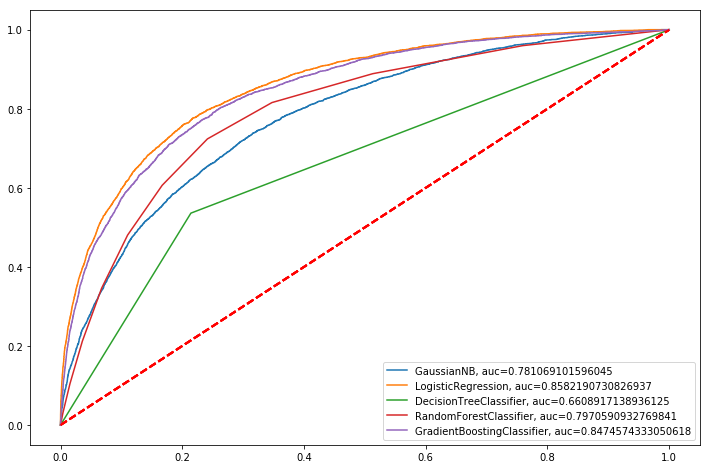

In [108]:
# definindo uma lista com os nomes das colunas  ## feito anteriormente
#feature_cols = list(df_train.columns)
#feature_cols.remove('target')
#feature_cols.remove('ID_code')

# importnado as bibliotecas com os modelos classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression   
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
# definindo uma lista com todos os classificadores
classifiers = [
    #KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    #SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]

# definindo o tamanho da figura para o gráfico
plt.figure(figsize=(12,8))

# rotina para instanciar, predizer e medir os resultados de todos os modelos
for clf in classifiers:
    # instanciando o modelo
    clf.fit(X_train, y_train)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    
    
    # plotando a curva ROC
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=name+", auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.legend(loc=4)

In [95]:
# Melhores resultados foram com LogisticRegression e GradientBoostingClassifier, 
# porém o valor de precision ainda é bem baixo em ambos os modelos.

### Análise GradientBoostingClassifier

In [109]:
from sklearn import metrics

In [110]:
clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [111]:
# atribuindo os valores da matriz às variáveis 
# tp: True Positive
# fp: False Positive
# fn: False Negative
# tn: True Negative

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

tn, fp, fn, tp

(27222, 6806, 1000, 2765)

In [112]:
# Cálculo da accuracy
# Representa  proporção de casos que foram corretamente previstos, 
#sejam eles verdadeiro positivo ou verdadeiro negativo.

accuracy = (tp+tn)/(tp+fp+tn+fn)
accuracy

0.7934538141983966

In [113]:
# Cálculo do score de outra forma (accuracy)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7934538141983966

In [115]:
# Cálculo da precisão

In [116]:
precision = tp/(tp+fp)
precision

0.2888935325462334

In [117]:
# Cálculo da Sensiblidade / Recall
# TPR: True Positive rate
# Representa a proporção de casos positivos que foram identificados corretamente.

recall = tp / (tp+fn)
recall

0.7343957503320053

In [118]:
# Cálculo da specificity
# Representa proporção de casos negativos que foram identificados corretamente

specificity = tn/(tn+fp)
specificity

0.7999882449747266

In [119]:
# Cálculo da prevalence

prevalence = (tp+fn)/(tp+fn+tn+fp)
prevalence

0.09962162305188792

In [120]:
# Cálculo do F1 score
f1_gb = 2*(precision*recall)/(precision+recall)
f1_gb

0.4146670665866827

In [121]:
#taxa de falsos positivos
false_positive = fp/(tn+fp)
false_positive

0.2000117550252733

#### Aplicando o Cross validation para o GradientBoostingClassifier

In [122]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
list(scores)

[0.786797928222459,
 0.8165521801417919,
 0.8176658584968041,
 0.8185842333406803,
 0.8149842039526853]

In [123]:
scores.mean()

0.8109168808308841

In [124]:
mean_scores_GB = scores.mean()

### Análise da LogisticRegression

In [112]:
# Temos que rodar novamente:

In [125]:
# Instanciando o modelo:
logreg = LogisticRegression().fit(X_train, y_train)

In [126]:
y_pred = logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7903315428783108


In [127]:
# atribuindo os valores da matriz às variáveis 
# tp: True Positive
# fp: False Positive
# fn: False Negative
# tn: True Negative

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

tn, fp, fn, tp

(26998, 7030, 894, 2871)

In [128]:
# Cálculo da accuracy
# Representa  proporção de casos que foram corretamente previstos, 
#sejam eles verdadeiro positivo ou verdadeiro negativo.

accuracy = (tp+tn)/(tp+fp+tn+fn)
accuracy

0.7903315428783108

In [129]:
# Cálculo do score de outra forma (accuracy)

In [130]:
accuracy_score(y_test,y_pred)

0.7903315428783108

In [131]:
# Cálculo da precisão

In [132]:
precision = tp/(tp+fp)
precision

0.28997071002929

In [133]:
# Cálculo da Sensiblidade / Recall
# TPR: True Positive rate
# Representa a proporção de casos positivos que foram identificados corretamente.

recall = tp / (tp+fn)
recall

0.7625498007968128

In [134]:
# Cálculo da specificity
# Representa proporção de casos negativos que foram identificados corretamente

specificity = tn/(tn+fp)
specificity

0.7934054308216762

In [135]:
# Cálculo da prevalence

prevalence = (tp+fn)/(tp+fn+tn+fp)
prevalence

0.09962162305188792

In [136]:
# Cálculo do F1 score

f1 = 2*(precision*recall)/(precision+recall)
f1

0.42016683740670285

In [137]:
#taxa de falsos positivos
false_positive = fp/(tn+fp)
false_positive

0.20659456917832372

#### Aplicando o Cross validation para LogisticRegression

In [138]:
scores_logreg = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
list(scores_logreg)

[0.782206222679352,
 0.7964037762186387,
 0.7960840496657116,
 0.7974248769377709,
 0.7940085225185511]

In [139]:
mean_scores_logreg= scores_logreg.mean() 

In [140]:
mean_scores_logreg

0.7932254896040047

## Calculando o target no arquivo para submissão ao Kaggle

In [141]:
# Dados de submissão

In [142]:
df_test_submission.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [143]:
df_test_submission.shape

(200000, 201)

In [144]:
# Primeiro temos que definir X_test_submission

In [145]:
X_test_submission = df_test_submission.drop(columns =[ 'ID_code']).copy()

In [146]:
# Verificando a remoção da coluna

In [147]:
X_test_submission.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [150]:
X_test_submission.shape

(200000, 200)

In [151]:
# Aplicando o scaling

In [152]:
#X_train1 = X_train_bal

In [153]:
#importando a biblioteca
#from sklearn.preprocessing import StandardScaler
#instanciando a variável
#sc = StandardScaler()
#ajustando os dados de treino
#X_train1 = sc.fit_transform(X_train1)
#transformando os dados de teste
X_test_submission = sc.transform(X_test_submission)

In [154]:
X_test_submission

array([[ 0.0563431 ,  2.38888541,  0.81231168, ...,  2.16055638,
        -0.06793473, -0.59165314],
       [-0.82124725,  0.68099265,  0.15747637, ...,  1.17218699,
         1.20789613, -1.83865607],
       [-1.87624572, -2.3582739 , -0.30478835, ..., -2.10017057,
         1.47523068, -2.06283843],
       ...,
       [ 0.253794  ,  0.94863362,  0.11883517, ...,  0.38239995,
        -1.35234766, -1.9709434 ],
       [ 0.92482938,  0.21833967,  1.09221218, ..., -0.88177178,
        -2.40487062,  0.27393252],
       [-0.15107728,  0.82564859, -0.27023764, ...,  1.7154058 ,
        -0.46501184, -0.48886134]])

In [155]:
X_test_submission.shape

(200000, 200)

In [156]:
# Aplicando o pca.transform em X_test_submission para redução da dimensionalidade

In [157]:
X_test_submission = pca.transform(X_test_submission)

In [158]:
X_test_submission

array([[ 0.80639648, -0.89606364,  0.63034424, ...,  1.58447374,
        -0.3681727 ,  0.41243121],
       [ 0.51701965, -0.65655056,  1.7111775 , ...,  1.52400627,
         1.06764744,  0.66849185],
       [-0.78374777, -1.30512391, -1.02340307, ..., -1.1736412 ,
         0.68639344, -1.00646549],
       ...,
       [-2.98449078, -0.27266959,  0.38560108, ...,  0.80358197,
        -0.13086872,  0.66651215],
       [-0.47707582,  1.66501659, -0.34136523, ...,  0.10192494,
        -0.19761659, -1.14900479],
       [ 0.17675028,  0.47363731,  0.49745187, ..., -0.67528889,
        -1.11827848,  0.5623387 ]])

In [159]:
X_test_submission.shape

(200000, 50)

In [160]:
#Agora temos 50 features em vez de 200

In [161]:
# Calculando a probabilidade y predito=1 com a LogisticRegression

In [162]:
logreg 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
y_pred_logreg = logreg.predict_proba(X_test_submission)

In [182]:
y_pred_logreg

array([[0.19962296, 0.80037704],
       [0.27475846, 0.72524154],
       [0.78289706, 0.21710294],
       ...,
       [0.99259609, 0.00740391],
       [0.64831404, 0.35168596],
       [0.45280522, 0.54719478]])

In [189]:
y_pred_logreg = y_pred_logreg[:,:1]

In [190]:
y_pred_logreg

array([[0.19962296],
       [0.27475846],
       [0.78289706],
       ...,
       [0.99259609],
       [0.64831404],
       [0.45280522]])

In [191]:
y_pred_logreg.shape

(200000, 1)

In [192]:
df_logReg= df_sample.copy()

In [193]:
df_logReg.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [194]:
type(df_logReg)

pandas.core.frame.DataFrame

In [195]:
df_logReg = df_logReg.drop(columns = ['target'])

In [196]:
df_logReg['target']=y_pred_logreg

In [197]:
df_logReg.head() 

,ID_code,target
0,test_0,0.199623
1,test_1,0.274758
2,test_2,0.782897
3,test_3,0.375150
4,test_4,0.690292


In [199]:
df_logReg.to_csv('resultado_RegLog_04_10_pred_prob.csv', index=False)

In [200]:
teste = pd.read_csv('resultado_RegLog_04_10_pred_prob.csv')
teste.head()

,ID_code,target
0,test_0,0.199623
1,test_1,0.274758
2,test_2,0.782897
3,test_3,0.375150
4,test_4,0.690292


## Resultado do Kaggle

In [ ]:
# Após submissão do arquivo no Kaggle do modelo com Regressão Logística:

In [ ]:
# Private Score: 0.85786
# Public Score: 0.85806